In [1]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.5.1"

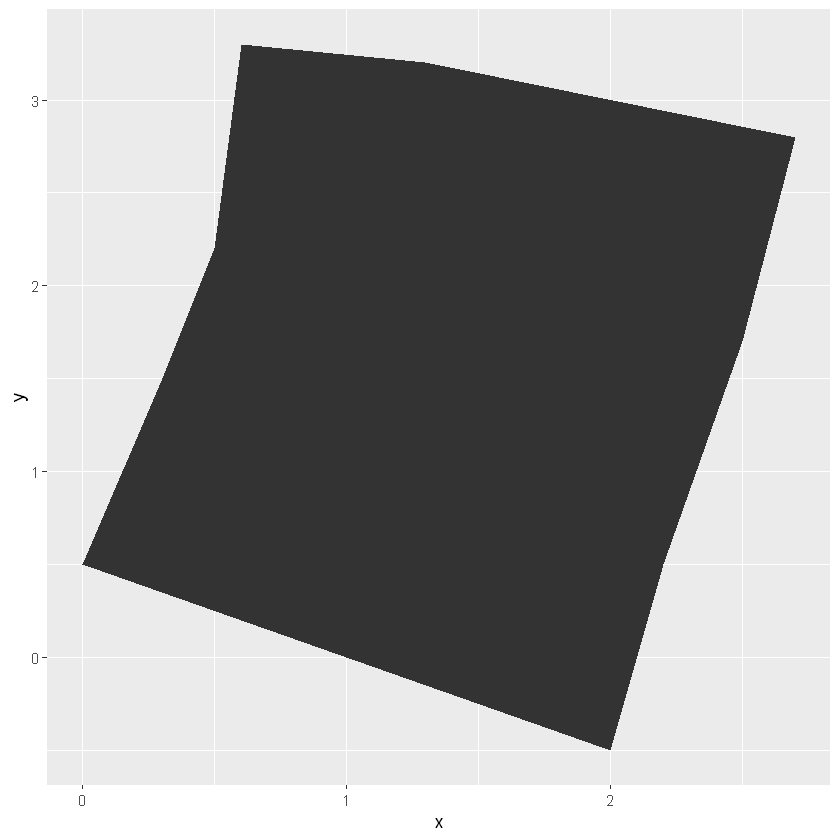

In [2]:
# When using geom_polygon, 2 data frames will be typically
# needed: one will contain the coordinates of each polygon
# (positions) and the other the values associated with each
# polygon (values). An id variable links the two together

ids <- factor(c("1.1", "2.1", "1.2", "2.2", "1.3", "2.3"))

values <- data.frame(
  id = ids,
  value = c(3, 3.1, 3.1, 3.2, 3.15, 3.5)
)

positions <- data.frame(
  id = rep(ids, each = 4),
  x = c(2, 1, 1.1, 2.2, 1, 0, 0.3, 1.1, 2.2, 1.1, 1.2, 2.5, 
        1.1, 0.3, 0.5, 1.2, 2.5, 1.2, 1.3, 2.7, 1.2, 0.5, 
        0.6, 1.3),
  y = c(-0.5, 0, 1, 0.5, 0, 0.5, 1.5, 1, 0.5, 1, 2.1, 1.7, 1, 
        1.5, 2.2, 2.1, 1.7, 2.1, 3.2, 2.8, 2.1, 2.2, 3.3, 3.2)
)

ggplot(values) +
  geom_map(aes(map_id = id), map = positions) +
  expand_limits(positions)

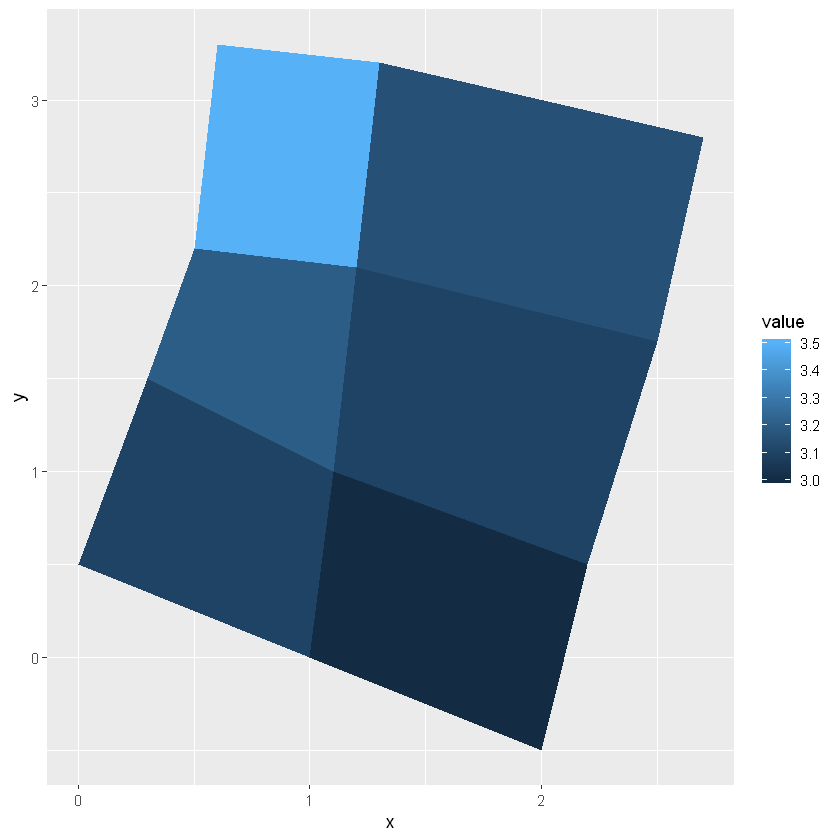

In [3]:
ggplot(values, aes(fill = value)) +
  geom_map(aes(map_id = id), map = positions) +
  expand_limits(positions)

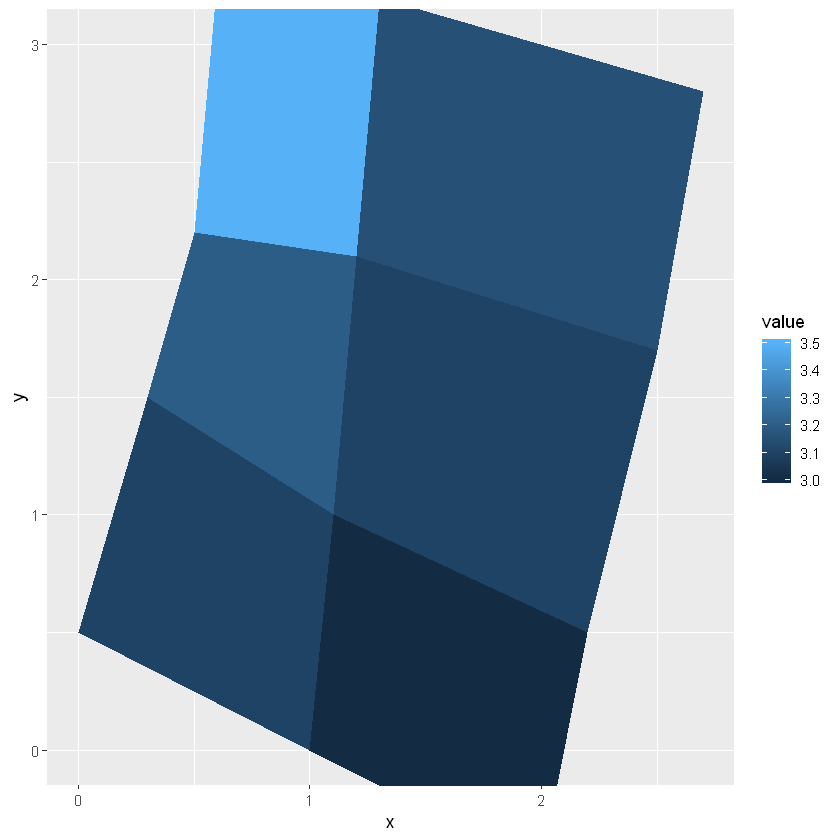

In [4]:
ggplot(values, aes(fill = value)) +
  geom_map(aes(map_id = id), map = positions) +
  expand_limits(positions) +
  ylim(0, 3)

Loading required package: maps


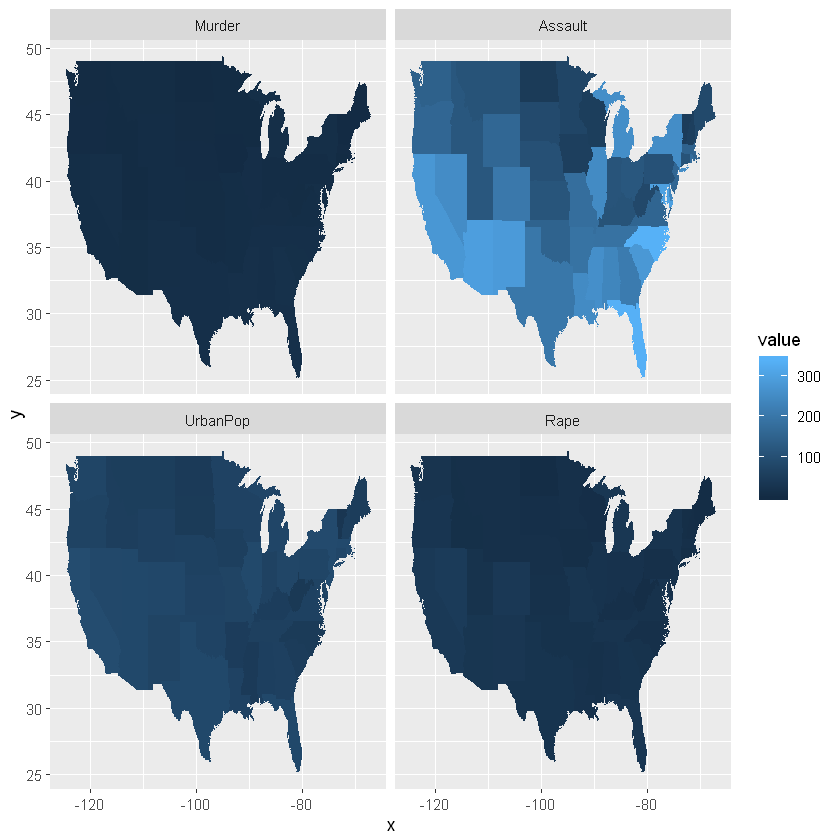

In [5]:
# A better example

crimes <- data.frame(state = tolower(rownames(USArrests)),
                     USArrests)
crimesm <- reshape2::melt(crimes, id = 1)

if(require(maps)) {
    states_map <- map_data("state")
    ggplot(crimes, aes(map_id = state)) +
      geom_map(aes(fill = Murder), map = states_map) +
      expand_limits(x = states_map$long, 
                    y = states_map$lat)
    
    last_plot() + coord_map()
    ggplot(crimesm, aes(map_id = state)) +
      geom_map(aes(fill = value), map = states_map) +
      expand_limits(x = states_map$long,
                    y = states_map$lat) +
      facet_wrap(~ variable)
}